In [11]:
from prophet import Prophet
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../data/01_data_cleaned.csv')

df['Date'] = pd.to_datetime(df['Date'])

# Week of month calculation
df['week_of_month'] = df['Date'].apply(lambda d: min((d.day - 1) // 7 + 1, 4))
df['week_number'] = df['Date'].dt.isocalendar().week

# Example: see the first few
df[['Date', 'week_of_month', 'week_number']].head()

,Date,week_of_month,week_number
0,2010-02-05,1,5
1,2010-02-12,2,6
2,2010-02-19,3,7
3,2010-02-26,4,8
4,2010-03-05,1,9


### Forecasting sales for Nov and Dec 2012 using Prophet:

In [5]:
# Prepare data
sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
sales = sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Fit model
model = Prophet(yearly_seasonality=True)
model.fit(sales)

22:41:31 - cmdstanpy - INFO - Chain [1] start processing
22:41:31 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Forecast sales for future dates
future = model.make_future_dataframe(periods=8, freq='W')  # 8 weeks for Nov/Dec
forecast = model.predict(future)

In [10]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.714684e+07,4.353403e+07,5.230937e+07,4.714684e+07,4.714684e+07,7.069258e+05,7.069258e+05,7.069258e+05,7.069258e+05,7.069258e+05,7.069258e+05,0.0,0.0,0.0,4.785376e+07
1,2010-02-12,4.714413e+07,4.431523e+07,5.289296e+07,4.714413e+07,4.714413e+07,1.414543e+06,1.414543e+06,1.414543e+06,1.414543e+06,1.414543e+06,1.414543e+06,0.0,0.0,0.0,4.855867e+07
2,2010-02-19,4.714141e+07,4.280014e+07,5.168842e+07,4.714141e+07,4.714141e+07,3.290195e+04,3.290195e+04,3.290195e+04,3.290195e+04,3.290195e+04,3.290195e+04,0.0,0.0,0.0,4.717431e+07
3,2010-02-26,4.713870e+07,4.162674e+07,5.040682e+07,4.713870e+07,4.713870e+07,-1.180922e+06,-1.180922e+06,-1.180922e+06,-1.180922e+06,-1.180922e+06,-1.180922e+06,0.0,0.0,0.0,4.595778e+07
4,2010-03-05,4.713598e+07,4.125431e+07,5.021076e+07,4.713598e+07,4.713598e+07,-1.452774e+06,-1.452774e+06,-1.452774e+06,-1.452774e+06,-1.452774e+06,-1.452774e+06,0.0,0.0,0.0,4.568321e+07


<Figure size 1000x600 with 0 Axes>

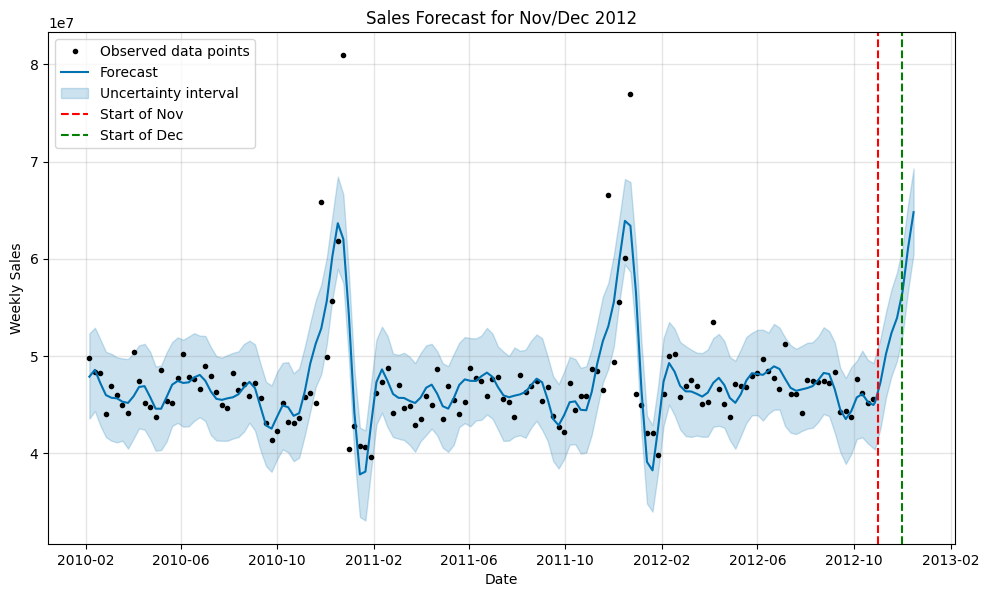

In [12]:
plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title('Sales Forecast for Nov/Dec 2012')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.axvline(pd.to_datetime('2012-11-01'), color='red', linestyle='--', label='Start of Nov')
plt.axvline(pd.to_datetime('2012-12-01'), color='green', linestyle='--', label='Start of Dec')
plt.legend()
plt.show()

As we can see from the Sales Forecasting, the sales is most likely to increase drastically in Nov and Dec, just like previous years.

**And following the trend, we can assume that the sales would be way above average on Thanksgiving and Christmas week, just like previous years.**